<a href="https://colab.research.google.com/github/EsteArgen/Aspectos_Aritmeticos_Teoria_Ehrhart/blob/main/Topolog%C3%ADa_Algebraica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

**Aspectos Aritméticos de la Teoría de Ehrhart**

</center>

<p align="center">
    <img src="https://logowik.com/content/uploads/images/escudo-de-la-universidad-nacional-de-colombia-20163327.logowik.com.webp" width="400">
</p>


<center>

# **Fundamentos visuales**

## **Conjuntos abiertos y cerrados**

---

<div align="justify">

En esta primera sección se exploran visualmente los conceptos fundamentales de la topología general, en particular los conjuntos abiertos y cerrados en distintos tipos de topologías definidas sobre subconjuntos de $ \mathbb{R}^2 $.

Este entorno interactivo permite al usuario modificar el tipo de topología, la posición y el tamaño del conjunto, y visualizar cómo cambian las propiedades de apertura o clausura bajo distintas estructuras topológicas.

Las topologías incluidas son:

- Topología euclidiana: base de abiertos dada por bolas abiertas euclidianas.

- Topología discreta: todos los subconjuntos son abiertos.

- Topología trivial: los únicos abiertos son el conjunto vacío y el total.

- Topología cofinita: los abiertos son aquellos cuyo complemento es finito.

- Topología de Zariski (en $ \mathbb{R}^2 $): los cerrados son los conjuntos algebraicos (ceros de polinomios), y los abiertos son sus complementos.



</div>

---

📥Importaciones📦

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, FloatSlider, Dropdown

**👨‍💻Implementación👩‍💻**

In [1]:

def crear_figura(set_type='abierto', topo_type='euclidiana', centro=(0.5, 0.5), radio=0.3):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_title(f"Conjunto {set_type} en topología: {topo_type}")
    ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='lightgray', alpha=0.3))

    color = 'skyblue' if set_type == 'abierto' else 'darkblue'
    alpha = 0.7 if set_type == 'abierto' else 0.4

    if topo_type == 'euclidiana':
        if set_type == 'abierto':
            ax.add_patch(patches.Circle(centro, radio, color=color, alpha=alpha))
        else:
            ax.add_patch(patches.Circle(centro, radio, color=color, alpha=alpha, fill=False, linewidth=2))

    elif topo_type == 'discreta':
        ax.plot(centro[0], centro[1], 'ro' if set_type == 'abierto' else 'ko', markersize=10)

    elif topo_type == 'trivial':
        if set_type == 'abierto':
            ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='orange', alpha=0.2))
        else:
            ax.plot([], [], label='Todos los subconjuntos no totales son cerrados')

    elif topo_type == 'cofinita':
        if set_type == 'abierto':
            ax.plot([], [], label='Abierto = complemento de conjunto finito')
        else:
            ax.plot(centro[0], centro[1], 'ks', markersize=6)

    elif topo_type == 'zariski':
        if set_type == 'abierto':
            ax.plot([], [], label='Abiertos = complementos de curvas algebraicas')
        else:
            t = np.linspace(0, 1, 200)
            ax.plot(t, t**2, color='purple', linewidth=2)

    plt.grid(True)
    plt.legend()
    plt.show()

@interact(
    set_type=Dropdown(options=['abierto', 'cerrado'], value='abierto', description='Tipo:'),
    topo_type=Dropdown(options=['euclidiana', 'discreta', 'trivial', 'cofinita', 'zariski'],
                       value='euclidiana', description='Topología:'),
    x=FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Centro x'),
    y=FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Centro y'),
    radio=FloatSlider(min=0.01, max=0.5, step=0.01, value=0.3, description='Radio')
)
def actualizar(set_type, topo_type, x, y, radio):
    crear_figura(set_type, topo_type, centro=(x, y), radio=radio)


interactive(children=(Dropdown(description='Tipo:', options=('abierto', 'cerrado'), value='abierto'), Dropdown…

## **Continuidad**

---

<div align="justify">

En esta sección se estudia la continuidad de funciones desde una perspectiva visual y analítica, utilizando la definición $\varepsilon$-$\delta$ en el contexto de topología general.

Se incluyen diferentes tipos de funciones $f : [0,1] \to \mathbb{R}$ para analizar su comportamiento en torno a un punto $x_0 \in [0,1]$:

- Función continua: $f(x) = \sin(2\pi x)$

- Función discontinua (salto clásico): una función por tramos con discontinuidad en $x = 0.5$

- Función con discontinuidad puntual: función con salto local y comportamiento oscilante
</div>

---

📥Importaciones📦

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, FloatSlider

**👨‍💻Implementación👩‍💻**

In [2]:

def funcion_continua(x):
    return np.sin(2 * np.pi * x)

def funcion_discontinua(x):
    y = np.copy(x)
    y[x < 0.5] = 0
    y[x >= 0.5] = 1
    return y

def funcion_saltos(x):
    return np.where(np.abs(x - 0.5) < 0.05, 1, 0.5 * np.sin(10 * x))

funciones = {
    'Continua (sinusoidal)': funcion_continua,
    'Discontinua (salto)': funcion_discontinua,
    'Casi continua (salto puntual)': funcion_saltos
}

@interact(
    funcion=Dropdown(options=list(funciones.keys()), description='Función:'),
    punto=FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Punto x₀'),
    epsilon=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description='ε')
)
def visualizar_continuidad(funcion, punto, epsilon):
    f = funciones[funcion]
    x = np.linspace(0, 1, 400)
    y = f(x)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, y, label='f(x)')
    ax.axvline(punto, color='gray', linestyle='--', alpha=0.5)

    fx0 = f(np.array([punto]))[0]
    ax.axhline(fx0 + epsilon, color='red', linestyle='--', linewidth=1)
    ax.axhline(fx0 - epsilon, color='red', linestyle='--', linewidth=1)
    ax.fill_between(x, fx0 - epsilon, fx0 + epsilon, where=(x > 0) & (x < 1), color='red', alpha=0.1, label='ε-entorno')

    ax.set_title(f"Visualización de continuidad en x = {punto:.2f}")
    ax.legend()
    plt.grid(True)
    plt.show()


interactive(children=(Dropdown(description='Función:', options=('Continua (sinusoidal)', 'Discontinua (salto)'…

# **Topología algebraica**

## **Complejos simpliciales**

---

<div align="justify">

Esta sección introduce el concepto de complejos simpliciales, que son combinaciones de simples elementos geométricos (símplices), vértices, aristas, triángulos, tetraedros, etc.— que se unen de manera coherente.

Se visualizan estructuras en dimensiones 2D y 3D formadas por:

- $0$-símplices (vértices),

- $1$-símplices (aristas),

- $2$-símplices (caras triangulares),

- $3$-símplices (tetraedros).

</div>

---

📥Importaciones📦

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from ipywidgets import interact, IntSlider, Dropdown

**👨‍💻Implementación👩‍💻**

In [9]:

vertices_2d = np.array([
    [0, 0],
    [1, 0],
    [0.5, 0.8]
])

vertices_3d = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0.5, 0.9, 0],
    [0.5, 0.5, 0.8]
])

def dibujar_2d(n):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    ax.set_title(f"Complejo simplicial 2D con {n}-símplex")

    if n >= 0:
        for i, (x, y) in enumerate(vertices_2d):
            ax.plot(x, y, 'ko')
            ax.text(x + 0.03, y + 0.03, f"v{i}", fontsize=12)

    if n >= 1:
        for i in range(3):
            ax.plot(*zip(vertices_2d[i], vertices_2d[(i+1)%3]), 'k-')

    if n == 2:
        ax.fill(vertices_2d[:, 0], vertices_2d[:, 1], color='skyblue', alpha=0.4)

    plt.grid(True)
    plt.show()

def dibujar_3d(n):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_title(f"Complejo simplicial 3D con {n}-símplex")

    if n >= 0:
        for i, (x, y, z) in enumerate(vertices_3d):
            ax.scatter(x, y, z, color='k')
            ax.text(x + 0.03, y + 0.03, z + 0.03, f"v{i}", fontsize=10)

    if n >= 1:
        for i in range(4):
            for j in range(i+1, 4):
                ax.plot(*zip(vertices_3d[i], vertices_3d[j]), color='k')

    if n >= 2:
        caras = [[0, 1, 2], [0, 1, 3], [1, 2, 3], [0, 2, 3]]
        for cara in caras:
            tri = vertices_3d[cara]
            ax.add_collection3d(Poly3DCollection([tri], alpha=0.3, color='skyblue'))

    if n == 3:
        ax.plot([0.5], [0.5], [0.5], 'ro', label='Centro del 3-símplex')
        ax.legend()

    plt.show()

@interact(
    dim=Dropdown(options=['2D', '3D'], value='2D', description='Dimensión:'),
    simplex=IntSlider(min=0, max=3, step=1, value=2, description='n-símplex')
)
def visualizar_complejo(dim, simplex):
    if dim == '2D':
        dibujar_2d(simplex if simplex <= 2 else 2)
    else:
        dibujar_3d(simplex)


interactive(children=(Dropdown(description='Dimensión:', options=('2D', '3D'), value='2D'), IntSlider(value=2,…

## **Homología simplicial**

---

<div align="justify">

En esta sección se construyen complejos simpliciales manualmente y se computan sus grupos de homología usando la librería gudhi.

Se incluye:

- Inserción explícita de símplices en una estructura SimplexTree.

- Visualización del complejo construido con vértices y aristas.

- Cálculo de los grupos $H_0$, $H_1$, etc., mediante la función .persistence().

- Visualización del diagrama de persistencia, donde se observan las clases de homología que aparecen y desaparecen durante la filtración.

Esto permite identificar, por ejemplo, la existencia de ciclos no rellenados (agujeros) como elementos no triviales en $H_1$.

</div>

---

🧠Instalación paquetes🫀

In [4]:

!pip install ripser persim scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.5 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=c66e7b6bbc32f9acded830ffa334e29986f0d9df0db730f4e47e32e62841d4a0
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp


📥Importaciones📦

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from sklearn.datasets import make_circles, make_swiss_roll

**👨‍💻Implementación👩‍💻**

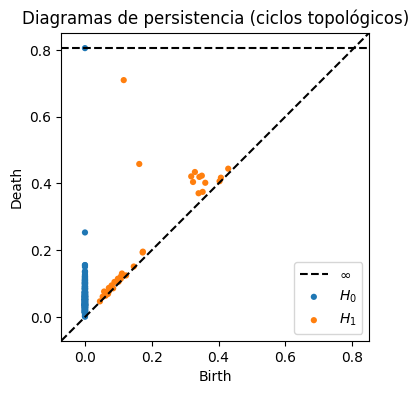

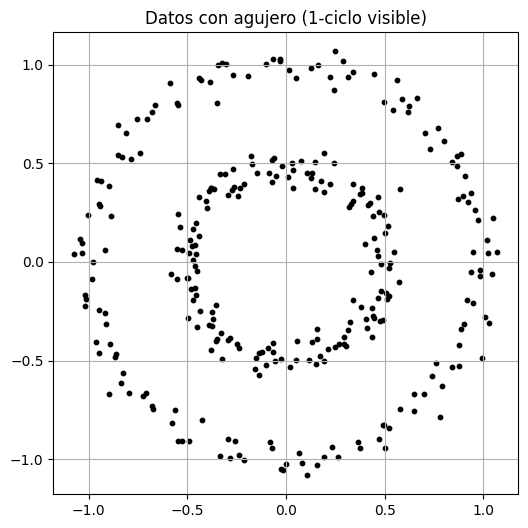

In [5]:


X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
diagrams = ripser(X)['dgms']

plt.figure(figsize=(8, 4))
plot_diagrams(diagrams, show=True, title='Diagramas de persistencia (ciclos topológicos)')
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c='black', s=10)
plt.title("Datos con agujero (1-ciclo visible)")
plt.axis('equal')
plt.grid(True)
plt.show()


🧠Instalación paquetes🫀

In [6]:

!pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.0 MB/s eta 0:00:00


📥Importaciones📦

In [ ]:

import gudhi
import matplotlib.pyplot as plt
import numpy as np

**👨‍💻Implementación👩‍💻**

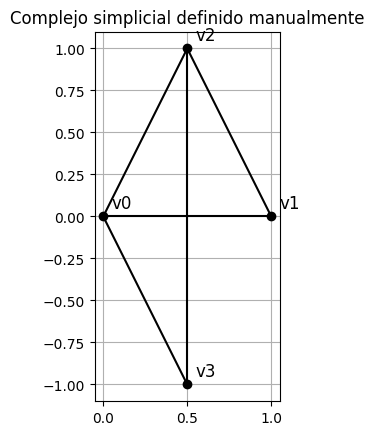

Grupos de homología:
H_0 con nacimiento/muerte: (0.0, inf)


/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

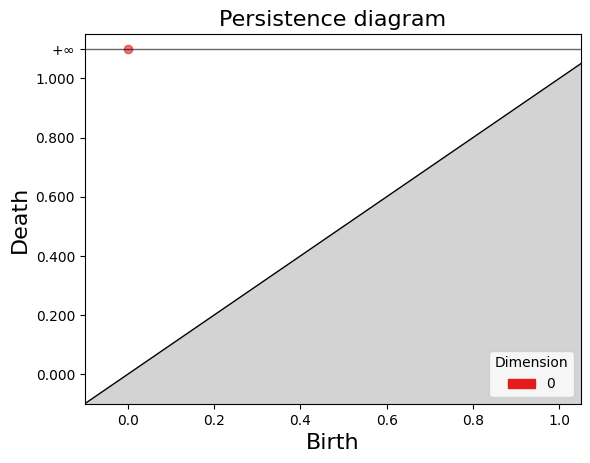

In [7]:


st = gudhi.SimplexTree()

st.insert([0])
st.insert([1])
st.insert([2])
st.insert([3])
st.insert([0, 1])
st.insert([1, 2])
st.insert([2, 0])
st.insert([2, 3])
st.insert([3, 0])

positions = {
    0: (0, 0),
    1: (1, 0),
    2: (0.5, 1),
    3: (0.5, -1)
}

fig, ax = plt.subplots()
for simplex in st.get_simplices():
    verts = simplex[0]
    if len(verts) == 2:
        x = [positions[v][0] for v in verts]
        y = [positions[v][1] for v in verts]
        ax.plot(x, y, 'k')
    elif len(verts) == 3:
        tri = [positions[v] for v in verts]
        poly = plt.Polygon(tri, color='skyblue', alpha=0.5)
        ax.add_patch(poly)
for v, (x, y) in positions.items():
    ax.plot(x, y, 'ko')
    ax.text(x + 0.05, y + 0.05, f"v{v}", fontsize=12)
ax.set_aspect('equal')
ax.set_title("Complejo simplicial definido manualmente")
plt.grid(True)
plt.show()

st.persistence()
print("Grupos de homología:")
for dim, interval in st.persistence():
    print(f"H_{dim} con nacimiento/muerte: {interval}")

gudhi.plot_persistence_diagram(st.persistence())


#**Cohomología de de Rham**

---

<div align="justify">

Aquí se estudian 1-formas diferenciales definidas sobre el disco unidad, y se exploran visualmente sus propiedades topológicas.

Se definen:

- Una forma exacta: $\omega = d(x^2 + y^2) = 2x\,dx + 2y\,dy$

- Una forma cerrada pero no exacta: $\omega = \frac{-y\,dx + x\,dy}{x^2 + y^2}$, que genera el grupo de cohomología de de Rham en dominios no simplemente conexos



</div>

---

📥Importaciones📦

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

**👨‍💻Implementación👩‍💻**

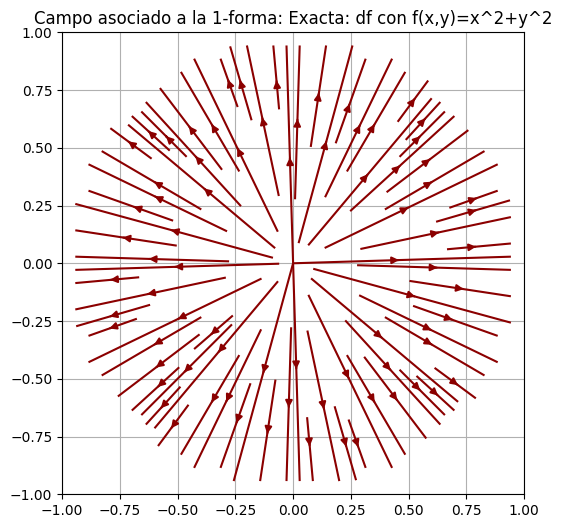

In [8]:

x_vals = np.linspace(-1, 1, 40)
y_vals = np.linspace(-1, 1, 40)
x, y = np.meshgrid(x_vals, y_vals)

mask = x**2 + y**2 <= 1.0


def exacta(x, y):
    # Forma exacta: w = d(f) con f(x, y) = x^2 + y^2 → w = 2x dx + 2y dy
    return 2*x, 2*y

def cerrada_no_exacta(x, y):
    # Forma cerrada no exacta (fuera del origen): w = (-y dx + x dy) / (x^2 + y^2)
    denom = x**2 + y**2
    denom[denom == 0] = 1e-9  # evitar división por 0 en el origen
    return -y / denom, x / denom

formas = {
    'Exacta: df con f(x,y)=x^2+y^2': exacta,
    'Cerrada no exacta: forma angular': cerrada_no_exacta
}

@interact(
    forma=Dropdown(options=list(formas.keys()), description='1-forma:')
)
def visualizar_1forma(forma):
    fx, fy = formas[forma](x, y)

    fx_masked = np.where(mask, fx, np.nan)
    fy_masked = np.where(mask, fy, np.nan)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.streamplot(x, y, fx_masked, fy_masked, color='darkred', density=1.2)
    ax.set_aspect('equal')
    ax.set_title(f"Campo asociado a la 1-forma: {forma}")
    plt.grid(True)
    plt.show()



# **Teoría de puntos fijos**

---

<div align="justify">

Representa visualmente una función $f : D^2 \to \mathbb{R}^2$ como un campo de flechas $f(x, y) - (x, y)$

Permite elegir distintas transformaciones $f$:

- Identidad: $f(x) = x$

- Contracción: $f(x) = \lambda x$ con $0 < \lambda < 1$

- Rotación alrededor del origen

- Traslación fuera del disco

Calcula y muestra el valor del número de Lefschetz $L(f)$ para cada caso.

Verifica visualmente la presencia o ausencia de puntos fijos.



</div>

---

📥Importaciones📦

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, FloatSlider

**👨‍💻Implementación👩‍💻**

In [10]:

x_vals = np.linspace(-1, 1, 30)
y_vals = np.linspace(-1, 1, 30)
x, y = np.meshgrid(x_vals, y_vals)

mask = x**2 + y**2 <= 1.0
x_masked = x[mask]
y_masked = y[mask]

def identidad(x, y):
    return x, y

def contraccion(x, y):
    return 0.5 * x, 0.5 * y

def rotacion(x, y, angle=np.pi / 2):
    x_new = np.cos(angle) * x - np.sin(angle) * y
    y_new = np.sin(angle) * x + np.cos(angle) * y
    return x_new, y_new

def traslacion(x, y):
    return x + 0.5, y + 0.5


funciones = {
    'Identidad (f(x)=x)': identidad,
    'Contracción hacia el centro': contraccion,
    'Rotación sin punto fijo': lambda x, y: rotacion(x, y, angle=np.pi / 2),
    'Traslación fuera del disco': traslacion
}

@interact(
    f=Dropdown(options=list(funciones.keys()), description='Función:'),
    alpha=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5, description='Transparencia')
)
def visualizar_funcion(f, alpha):
    fx, fy = funciones[f](x_masked, y_masked)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.quiver(x_masked, y_masked, fx - x_masked, fy - y_masked, angles='xy', scale_units='xy', scale=1, color='crimson', alpha=alpha)
    ax.set_title(f'Transformación: {f}')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.grid(True)
    plt.show()

    if f == 'Identidad (f(x)=x)':
        print("Número de Lefschetz L(f) = 1 (punto fijo garantizado)")
    elif f == 'Contracción hacia el centro':
        print("L(f) = 1 → hay punto fijo (en el centro)")
    elif f == 'Rotación sin punto fijo':
        print("L(f) = 0 → puede no haber punto fijo")
    elif f == 'Traslación fuera del disco':
        print("L(f) = 0 → no hay punto fijo (f sale del dominio)")


interactive(children=(Dropdown(description='Función:', options=('Identidad (f(x)=x)', 'Contracción hacia el ce…

---

<div align="justify">

Esta extensión visualiza cómo varía el número de Lefschetz $L(f_t)$ a lo largo de una familia continua de funciones $f_t : D^2 \to D^2$, donde $t \in [0,1]$.

Se considera la familia:

$$
f_t(x, y) = R_{t\pi}(x, y)
$$


donde $R_{\theta}$ es una rotación en sentido antihorario de ángulo $\theta = t\pi$ alrededor del origen. Esto permite interpolar entre:

- $t = 0$: la identidad (fija todos los puntos),

- $t = 1$: una rotación de 180°, que no tiene punto fijo en el disco.


</div>

---

📥Importaciones📦

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Play, jslink, HBox, VBox

**👨‍💻Implementación👩‍💻**

In [11]:

x_vals = np.linspace(-1, 1, 30)
y_vals = np.linspace(-1, 1, 30)
x, y = np.meshgrid(x_vals, y_vals)

mask = x**2 + y**2 <= 1.0
x_masked = x[mask]
y_masked = y[mask]

def rotacion_parametrica(x, y, t):
    angle = t * np.pi
    x_new = np.cos(angle) * x - np.sin(angle) * y
    y_new = np.sin(angle) * x + np.cos(angle) * y
    return x_new, y_new

play = Play(
    value=0,
    min=0,
    max=20,
    step=1,
    interval=200,
    description="Animar",
    disabled=False
)

slider = FloatSlider(
    value=0,
    min=0,
    max=1,
    step=0.05,
    description='t ∈ [0,1]'
)

jslink((play, 'value'), (slider, 'value'))

@interact(t=slider)
def animar_rotacion(t):
    fx, fy = rotacion_parametrica(x_masked, y_masked, t)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.quiver(x_masked, y_masked, fx - x_masked, fy - y_masked, angles='xy', scale_units='xy', scale=1, color='crimson', alpha=0.8)
    ax.set_title(f'Transformación f_t con t = {t:.2f}')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.grid(True)
    plt.show()

    if np.isclose(t, 0):
        print("t = 0 → f es la identidad ⇒ L(f) = 1 ⇒ punto fijo garantizado")
    elif np.isclose(t, 1):
        print("t = 1 → rotación 180° ⇒ L(f) = 0 ⇒ puede no haber punto fijo")
    else:
        print("Interpolación continua entre identidad y rotación")

VBox([play, slider])


interactive(children=(FloatSlider(value=0.0, description='t ∈ [0,1]', max=1.0, step=0.05), Output()), _dom_cla…